Accuracy: 0.6150
ROC-AUC: 0.6480
              precision    recall  f1-score   support

           0       0.63      0.72      0.67      2718
           1       0.59      0.49      0.54      2282

    accuracy                           0.61      5000
   macro avg       0.61      0.61      0.60      5000
weighted avg       0.61      0.61      0.61      5000



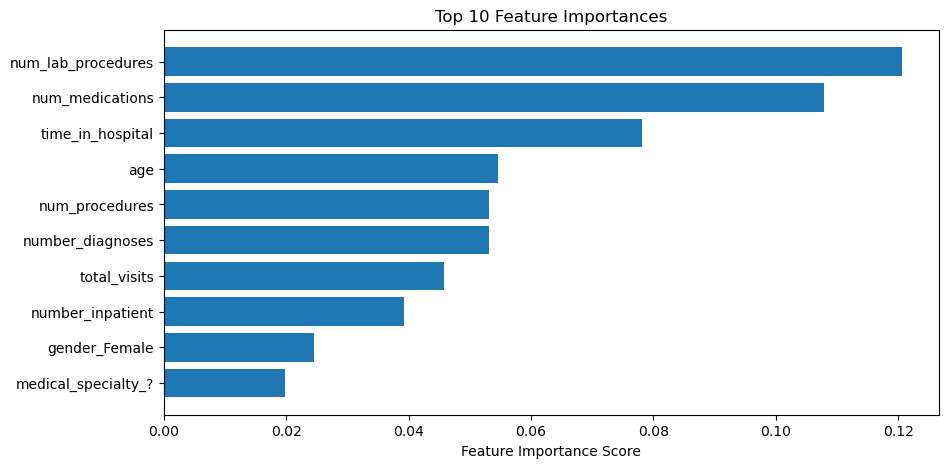

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# This is to load the dataset
file_path = r"C:\Users\usmank\OneDrive - Access-ARM Pensions\Documents\Nexford Assignments\Business Analytics Capstone\Module 4 Assignment\Milestone 1 Cleaned data.csv"
df = pd.read_csv(file_path)

# This is to handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# This is to define features and target variable
X = df.drop(columns=['readmitted'])
y = df['readmitted']

# This is to standardize numerical features
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# This is tp split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# This is to train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# This is to make predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# This is to evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
print(classification_report(y_test, y_pred))

# This is to plot feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10, 5))
plt.title("Top 10 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Feature Importance Score")
plt.show()
